In [ ]:
import requests  # To send HTTP requests
from bs4 import BeautifulSoup  # To parse HTML content
import pandas as pd  # To work with data structures like DataFrame
import os  # To interact with the operating system (checking if a file exists)
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# Base URL of the website to scrape
base_url = 'https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki'
# Initialize empty lists to store the scraped data
names = []         # List to store product names
ratings = []       # List to store product ratings
numberReviews = [] # List to store the number of reviews
prices = []        # List to store product prices
bonuses = []       # List to store any bonuses associated with products
credits = []       # List to store credit terms for products

# Loop over pages 1 to 40 to scrape multiple pages of products
for page in range(1, 41):
    print(f"Scraping page {page}...")  # Display progress
    url = f'{base_url}?page={page}'    # Construct URL for each page

    # Send a GET request to the URL and fetch the page content
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for unsuccessful requests

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all products on the current page
    products = soup.find_all('div', class_='ProductCardV_card__xHsl_ ProductItem_product__hZy7p')

    # Loop through each product and extract required information
    for product in products:
        # Extract product name (if available), otherwise use 'N/A'
        name = product.find('p', class_='Typography ProductCardV_title__U38HX ProductCardV_loading___io2a Typography__M')
        names.append(name.text.strip() if name else 'N/A')

        # Extract product rating (if available), otherwise use 'N/A'
        rating = product.find('p', class_='Typography RatingAndReviewsCount_rating__evIGS Typography__M Typography__M_Bold')
        ratings.append(rating.text.strip() if rating else 'N/A')

        # Extract number of reviews (if available), otherwise use 'N/A'
        numberReview = product.find('p', class_='Typography RatingAndReviewsCount_review__HbHsZ Typography__M')
        numberReviews.append(numberReview.text.strip() if numberReview else 'N/A')

        # Extract product price (if available), otherwise use 'N/A'
        price = product.find('p', class_='Typography ProductCardPrices_price__oCsLy Typography__Subtitle')
        prices.append(price.text.strip() if price else 'N/A')

        # Extract bonus information (if available), otherwise use 'N/A'
        bonus = product.find('p', class_='ProductCardBonus_content__gHJd4')
        bonuses.append(bonus.text.strip() if bonus else 'N/A')

        # Extract credit terms (if available), otherwise use 'N/A'
        credit = product.find('div', class_='ProductCardCreditTerms_creditTerms__LaVNO')
        credits.append(credit.text.strip() if credit else 'N/A')

# Create a dictionary with the scraped data
data = {
    'Product Name': names,
    'Product Rating': ratings,
    'Number of reviews': numberReviews,
    'Price': prices,
    'Bonus': bonuses,
    'Credit': credits
}

# Convert the dictionary into a DataFrame for easy manipulation and storage
df = pd.DataFrame(data)

# Define the file path where data will be saved
csv_file = '/content/ml_final_dataset.csv'

# Check if the CSV file already exists
if os.path.isfile(csv_file):
    # If the file exists, append new data without writing the header
    df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    # If the file doesn't exist, write new data with headers
    df.to_csv(csv_file, mode='w', header=True, index=False)

# Print a message confirming successful data storage
print(f"Data successfully saved to {csv_file}")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Data successfully saved to /content/ml_final_dataset.csv


In [ ]:
import pandas as pd
data= pd.read_csv('/content/ml_final_dataset.csv')
data.head()

,Product Name,Product Rating,Number of reviews,Price,Bonus,Credit
0,Ноутбук Huawei MateBook D16 i5 12450H / 16ГБ /...,4.8,(14),359 990 ₸,до + 19 499 бонусов,от 12 618 ₸ x 60 мес
1,"Ноутбук 15,6'' Asus Vivobook 15 i5 1235U / 16Г...",5.0,(6),299 990 ₸,до + 14 999 бонусов,от 9 706 ₸ x 60 мес
2,Игровой ноутбук Lenovo LOQ 15IAX9 i5 12450HX /...,5.0,(1),439 990 ₸,до + 21 999 бонусов,от 14 235 ₸ x 60 мес
3,Игровой ноутбук Asus TUF Gaming F17 i5 12500H/...,5.0,(4),479 990 ₸,до + 23 999 бонусов,от 15 530 ₸ x 60 мес
4,Ультрабук Acer Gadget ETBook E10 i5 12450H / 1...,5.0,(1),279 990 ₸,до + 13 999 бонусов,от 9 059 ₸ x 60 мес


In [ ]:
# Update the return statement to include 'operating_system'
def process_product(product_name):
    """
    Process the product name to classify its purpose, extract RAM, SSD, and clean the name.
    """
    # Clean up the product name
    product_name = product_name.replace("\xa0", " ")  # Replace non-breaking spaces
    product_name = re.sub(r"\s+", " ", product_name.strip())  # Normalize spaces

    # Identify purpose
    if "Игровой ноутбук" in product_name:
        purpose = "For game"
    elif "Ноутбук" in product_name:
        purpose = "For study"
    else:
        purpose = "Both"

    # Extract SSD size explicitly
    ssd_match = re.search(r"(\d+)\s*[Гг]?[Бб]?\s*SSD", product_name, re.IGNORECASE)
    ssd = int(ssd_match.group(1)) if ssd_match else np.nan

    # Extract RAM size explicitly
    ram_match = re.search(r"(\d+)[Гг][Бб]\s*(?!SSD)", product_name, re.IGNORECASE)
    ram = int(ram_match.group(1)) if ram_match else np.nan

    # Extract operating system
    os_match = re.search(r"(DOS|Win\d+)", product_name, re.IGNORECASE)
    operating_system = os_match.group(1) if os_match else "MacOS"

    # Clean product name
    name = re.sub(r"(Игровой ноутбук|Ноутбук)", "", product_name, flags=re.IGNORECASE).strip()

    return name, purpose, ram, ssd, operating_system

# Apply the function and update DataFrame creation
processed_data = data['Product Name'].apply(process_product)
processed_df = pd.DataFrame(processed_data.tolist(), columns=["Product Name", "Purpose", "RAM", "SSD", "Operating System"])

# Add other relevant columns if available
if 'Price' in data.columns:
    processed_df["Price"] = data["Price"]
else:
    processed_df["Price"] = np.nan  # Fill with NaN if not available

if 'Product Rating' in data.columns:
    processed_df["Product Rating"] = data["Product Rating"]
else:
    processed_df["Product Rating"] = np.nan  # Fill with NaN if not available

# Save the updated DataFrame to a new CSV file
output_file = "/content/2.csv"
processed_df.to_csv(output_file, index=False)
print(f"Processed DataFrame saved as '{output_file}'")


Processed DataFrame saved as '/content/2.csv'


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
processed_df =pd.read_csv('/content/ml - 2.csv')
processed_df.head()

,Product Name,Purpose,RAM,SSD,Operating System,Price,Product Rating
0,"15,6'' Asus Vivobook 15 i5 1235U / 16ГБ / 512S...",For study,16.0,512.0,DOS,299 990 ₸,5.0
1,Lenovo LOQ 15IAX9 i5 12450HX / 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,459 990 ₸,NaN
2,Ультрабук Acer Gadget ETBook E10 i5 12450H / 1...,Both,16.0,512.0,Win11,279 990 ₸,NaN
3,Asus TUF Gaming F17 i5 12500H/ 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,479 990 ₸,5.0
4,Apple MacBook Air Retina Space Gray M1 / 8ГБ /...,For study,8.0,256.0,MacOS,439 990 ₸,4.7


In [2]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      222 non-null    object 
 1   Purpose           222 non-null    object 
 2   RAM               171 non-null    float64
 3   SSD               182 non-null    float64
 4   Operating System  222 non-null    object 
 5   Price             222 non-null    object 
 6   Product Rating    52 non-null     float64
dtypes: float64(3), object(4)
memory usage: 12.3+ KB


In [3]:
# Clean the Price column
processed_df['Price'] = processed_df['Price'].str.replace('\u00a0', '').str.replace('₸', '').str.replace('\s+', '', regex=True)
processed_df['Price'] = pd.to_numeric(processed_df['Price'], errors='coerce')

In [4]:
processed_df.head()

,Product Name,Purpose,RAM,SSD,Operating System,Price,Product Rating
0,"15,6'' Asus Vivobook 15 i5 1235U / 16ГБ / 512S...",For study,16.0,512.0,DOS,299990,5.0
1,Lenovo LOQ 15IAX9 i5 12450HX / 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,459990,NaN
2,Ультрабук Acer Gadget ETBook E10 i5 12450H / 1...,Both,16.0,512.0,Win11,279990,NaN
3,Asus TUF Gaming F17 i5 12500H/ 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,479990,5.0
4,Apple MacBook Air Retina Space Gray M1 / 8ГБ /...,For study,8.0,256.0,MacOS,439990,4.7


In [5]:
processed_df.shape

(222, 7)

In [6]:
processed_df.isnull().sum()

,0
Product Name,0
Purpose,0
RAM,51
SSD,40
Operating System,0
Price,0
Product Rating,170


In [7]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      222 non-null    object 
 1   Purpose           222 non-null    object 
 2   RAM               171 non-null    float64
 3   SSD               182 non-null    float64
 4   Operating System  222 non-null    object 
 5   Price             222 non-null    int64  
 6   Product Rating    52 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.3+ KB


In [8]:
# Drop rows where the 'price' column has missing values
processed_df = processed_df.dropna(subset=['RAM'])
processed_df = processed_df.dropna(subset=['SSD'])
median_A = processed_df['Product Rating'].median()
processed_df['Product Rating'] = processed_df['Product Rating'].fillna(median_A)

In [9]:
processed_df.isnull().sum()

,0
Product Name,0
Purpose,0
RAM,0
SSD,0
Operating System,0
Price,0
Product Rating,0


In [10]:
processed_df.describe()

,RAM,SSD,Price,Product Rating
count,167.000000,167.000000,1.670000e+02,167.000000
mean,15.580838,629.556886,6.579235e+05,4.928743
std,8.761450,311.951448,4.623305e+05,0.370623
min,8.000000,256.000000,1.999900e+05,1.000000
25%,8.000000,512.000000,3.599900e+05,5.000000
50%,16.000000,512.000000,4.999900e+05,5.000000
75%,16.000000,1000.000000,8.424900e+05,5.000000
max,64.000000,2000.000000,2.554990e+06,5.000000


In [11]:
processed_df['Price'] = processed_df['Price'].astype(float)

In [12]:
processed_df.head()

,Product Name,Purpose,RAM,SSD,Operating System,Price,Product Rating
0,"15,6'' Asus Vivobook 15 i5 1235U / 16ГБ / 512S...",For study,16.0,512.0,DOS,299990.0,5.0
1,Lenovo LOQ 15IAX9 i5 12450HX / 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,459990.0,5.0
2,Ультрабук Acer Gadget ETBook E10 i5 12450H / 1...,Both,16.0,512.0,Win11,279990.0,5.0
3,Asus TUF Gaming F17 i5 12500H/ 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,479990.0,5.0
4,Apple MacBook Air Retina Space Gray M1 / 8ГБ /...,For study,8.0,256.0,MacOS,439990.0,4.7


In [12]:
processed_df['SSD'].value_counts()

,count
SSD,
512.0,98
1000.0,40
256.0,23
2000.0,3
1024.0,3


In [13]:
processed_df['RAM'].value_counts()

,count
RAM,
16.0,90
8.0,57
32.0,9
36.0,6
48.0,2
64.0,1
18.0,1
24.0,1


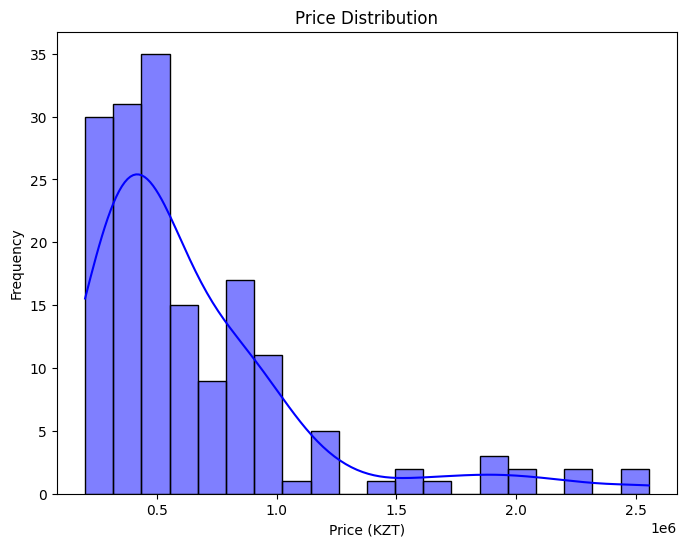

In [14]:
# Distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(processed_df['Price'], bins=20, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (KZT)')
plt.ylabel('Frequency')
plt.show()


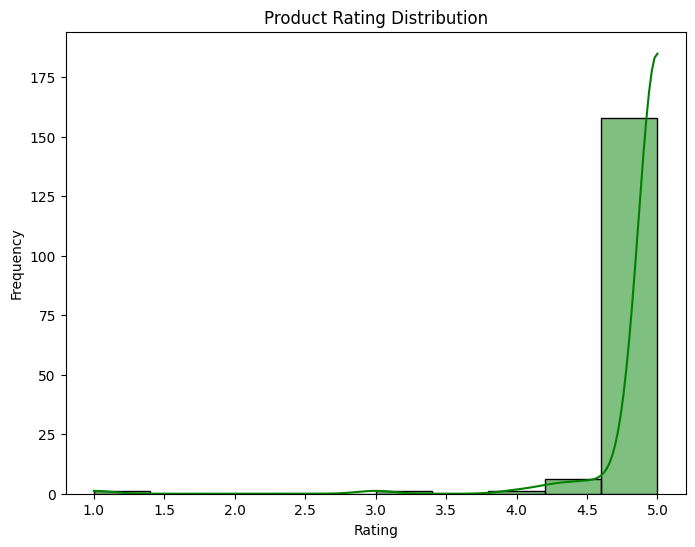

In [15]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(processed_df['Product Rating'], bins=10, kde=True, color='green')
plt.title('Product Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-3c9937e3f7e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=processed_df, x='Purpose', y='RAM', palette='Set2')


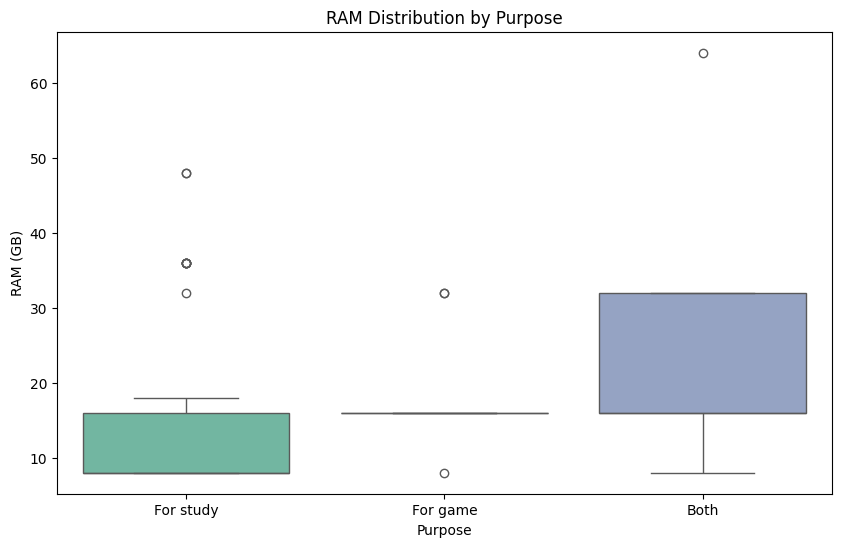

In [16]:
# Boxplot for RAM across purposes
plt.figure(figsize=(10, 6))
sns.boxplot(data=processed_df, x='Purpose', y='RAM', palette='Set2')
plt.title('RAM Distribution by Purpose')
plt.xlabel('Purpose')
plt.ylabel('RAM (GB)')
plt.show()

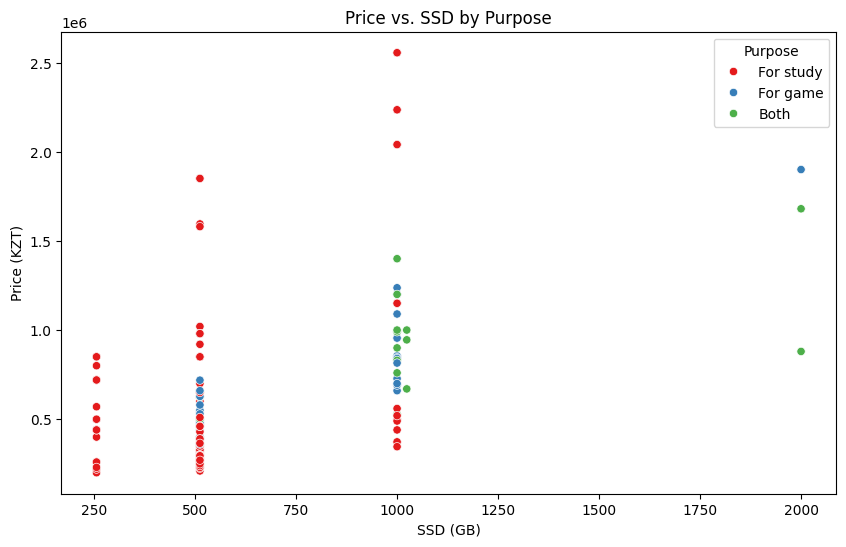

In [17]:
# Scatter plot for Price vs. SSD
plt.figure(figsize=(10, 6))
sns.scatterplot(data=processed_df, x='SSD', y='Price', hue='Purpose', palette='Set1')
plt.title('Price vs. SSD by Purpose')
plt.xlabel('SSD (GB)')
plt.ylabel('Price (KZT)')
plt.legend(title='Purpose')
plt.show()

In [18]:
def simulate_user_data(data, num_users=2, random_state=42):
    """
    Assign different User IDs and Ratings for collaborative filtering simulation.
    """
    np.random.seed(random_state)  # Set random state for reproducibility
    simulated_data = []
    for _, row in data.iterrows():
        for user_id in range(1, num_users + 1):
            rating = np.random.uniform(0, 5)  # Random ratings between 1 and 5
            simulated_data.append({
                'User ID': user_id,
                'Product ID': row['Product ID'],
                'Product Name': row['Product Name'],
                'Product Rating': rating
            })
    return pd.DataFrame(simulated_data)


In [19]:
def assign_ids(data):
    data = data.copy()
    data['Product ID'] = range(1, len(data) + 1)
    return data


In [20]:
def user_preferences(purpose):
    print(f"Enter preferences for {purpose}:")
    try:
        ram = int(input("Preferred RAM (GB): "))
        ssd = int(input("Preferred SSD size (GB): "))
        min_price = float(input("Minimum price (KZT): "))
        max_price = float(input("Maximum price (KZT): "))
        if min_price > max_price:
            print("Minimum price cannot be greater than maximum price. Restart and try again.")
            exit()
    except ValueError:
        print("Invalid input. Please enter numerical values.")
        exit()

    return {'RAM': ram, 'SSD': ssd, 'Min Price': min_price, 'Max Price': max_price}

In [21]:
def collaborative_recommendations(user_id):
    """
    Recommend laptops based on user-item collaborative filtering using cosine similarity.
    """
    # Create the user-item matrix
    user_item_matrix = simulated_user_data.pivot_table(
        index='User ID',
        columns='Product ID',
        values='Product Rating'
    ).fillna(0)

    # Check if user_id exists
    if user_id not in user_item_matrix.index:
        return pd.DataFrame()  # Return empty DataFrame if user_id not found

    # Compute cosine similarity
    cosine_sim = cosine_similarity(user_item_matrix)

    # Get the user index for the provided user_id
    user_idx = user_item_matrix.index.get_loc(user_id)

    # Get similarity scores for the target user
    sim_scores = list(enumerate(cosine_sim[user_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Skip the target user (first one in the sorted list) and get the next 5 most similar users
    top_users = sim_scores[1:6]
    similar_user_indices = [idx for idx, score in top_users]

    # Get product recommendations based on similar users' ratings
    recommended_products = user_item_matrix.iloc[similar_user_indices].mean(axis=0)
    recommended_products = recommended_products.sort_values(ascending=False).head(5)

    # Map product IDs back to product names
    recommended_product_ids = recommended_products.index
    return processed_df[processed_df['Product ID'].isin(recommended_product_ids)][['Product ID', 'Product Name', 'Price', 'RAM', 'SSD']]


In [22]:
def content_based_filtering(data, user_preferences):
    """
    Recommend laptops based on cosine similarity.
    """
    # Fill NaN values with 0 (or other suitable default values)
    features = data[['RAM', 'SSD', 'Price']].fillna(0)

    # Normalize feature values
    features_normalized = (features - features.min()) / (features.max() - features.min())
    features_normalized = features_normalized.fillna(0)  # Ensure no NaN after normalization

    # Prepare user vector and normalize it
    user_vector = np.array([
        user_preferences['RAM'],
        user_preferences['SSD'],
        (user_preferences['Min Price'] + user_preferences['Max Price']) / 2
    ])
    user_vector_normalized = (user_vector - features.min().values) / (features.max().values - features.min().values)
    user_vector_normalized = np.nan_to_num(user_vector_normalized)  # Handle any residual NaN values

    # Compute cosine similarity
    similarity_scores = cosine_similarity([user_vector_normalized], features_normalized.values)[0]

    # Append similarity scores to the data and sort
    data = data.copy()
    data['Similarity'] = similarity_scores
    return data.sort_values(by='Similarity', ascending=False)


In [23]:
def hybrid_filtering(data, user_preferences, content_top_n=5, collaborative_user_id=2):
    """
    Combine content-based and collaborative filtering for recommendations.
    """
    content_recs = content_based_filtering(data, user_preferences).head(content_top_n)

    # Get collaborative recommendations for the specified user
    collaborative_recs = collaborative_recommendations(collaborative_user_id)

    # Ensure collaborative_recs has the necessary columns
    if not collaborative_recs.empty:
        if 'Similarity' not in collaborative_recs.columns:
            collaborative_recs['Similarity'] = np.nan
        collaborative_recs = collaborative_recs[['Product ID', 'Product Name', 'Price', 'RAM', 'SSD', 'Similarity']]

    # Combine content-based and collaborative recommendations
    if not collaborative_recs.empty:
        hybrid_recs = pd.concat([
            content_recs[['Product ID', 'Product Name', 'Price', 'RAM', 'SSD', 'Similarity']],
            collaborative_recs
        ], ignore_index=True).drop_duplicates(subset='Product ID')
    else:
        hybrid_recs = content_recs[['Product ID', 'Product Name', 'Price', 'RAM', 'SSD', 'Similarity']]

    return hybrid_recs.sort_values(by='Similarity', ascending=False)


In [24]:
5# User input for purpose and OS
print("Select the purpose of the laptop:")
print("1) Gaming")
print("2) Study")
print("3) Both")
try:
    purpose_choice = int(input("Enter your choice (1, 2, or 3): "))
    if purpose_choice == 1:
        purpose = "For game"
    elif purpose_choice == 2:
        purpose = "For study"
    elif purpose_choice == 3:
        purpose = "Both"
    else:
        print("Invalid choice. Restart and try again.")
        exit()
except ValueError:
    print("Invalid input. Restart and enter a number.")
    exit()

# Filter laptops based on purpose
filtered_df = processed_df[processed_df['Purpose'] == purpose]
filtered_df = assign_ids(filtered_df)

# Ask about OS preference
os_choice = input("Do you want a specific operating system? (yes/no): ").lower()
if os_choice == 'yes':
    filtered_df = filtered_df[filtered_df['Operating System'].isin(['Win11', 'MacOS'])]
elif os_choice == 'no':
    filtered_df = filtered_df[filtered_df['Operating System'] == 'DOS']

if filtered_df.empty:
    print("No laptops found matching your criteria. Try different preferences.")
    exit()

# Get user preferences
user_preferences = user_preferences(purpose)

# Further filter within price range
filtered_df = filtered_df[
    (filtered_df['Price'] >= user_preferences['Min Price']) &
    (filtered_df['Price'] <= user_preferences['Max Price'])
]

if filtered_df.empty:
    print("No laptops found within your price range. Please try again.")
    exit()

# Get recommendations
content_recs = content_based_filtering(filtered_df, user_preferences)

# Display top recommendations
print("\nTop Content-Based Recommendations:")
print(content_recs[['Product Name','Purpose', 'Operating System', 'Price', 'RAM', 'SSD', 'Similarity']].head())

Select the purpose of the laptop:
1) Gaming
2) Study
3) Both
Enter your choice (1, 2, or 3): 2
Do you want a specific operating system? (yes/no): yes
Enter preferences for For study:
Preferred RAM (GB): 8
Preferred SSD size (GB): 512
Minimum price (KZT): 350000
Maximum price (KZT): 450000

Top Content-Based Recommendations:
                                          Product Name    Purpose  \
4    Apple MacBook Air Retina Space Gray M1 / 8ГБ /...  For study   
89   Apple MacBook Air Retina Gold M1 / 8ГБ / 256SS...  For study   
142  Apple MacBook Air Space Gray M2 / 8ГБ / 256SSD...  For study   
150  Apple MacBook Air Retina Silver M1 / 8ГБ / 256...  For study   
166  Apple MacBook Air Retina Gold M1 / 8ГБ / 256SS...  For study   

    Operating System     Price  RAM    SSD  Similarity  
4              MacOS  439990.0  8.0  256.0     0.82385  
89             MacOS  439990.0  8.0  256.0     0.82385  
142            MacOS  399990.0  8.0  256.0     0.82385  
150            MacOS  439990.0 

In [28]:
processed_df = assign_ids(processed_df)
simulated_user_data = simulate_user_data(processed_df)
print("\nTop Recommendations for  User:")
print(collaborative_recommendations(2))



Top Recommendations for  User:
     Product ID                                       Product Name     Price  \
18           18  Asus VivoBook 15 i5 1235U/ 8ГБ / 512SSD / 15.6...  319990.0   
26           26  Apple MacBook Air 13 Midnight 2024 M3 / 8ГБ / ...  719990.0   
99           78  Asus TUF Gaming F16 i7 13650HX / 16ГБ / 1000SS...  727990.0   
148         114  Asus ROG Zephyrus G16 U7 155H / 16ГБ / 1000SSD...  854990.0   
163         125  Apple MacBook Air 13 Starlight 2024 M3 / 8ГБ /...  849990.0   

      RAM     SSD  
18    8.0   512.0  
26    8.0   256.0  
99   16.0  1000.0  
148  16.0  1000.0  
163   8.0   512.0  


In [27]:
simulated_user_data

,User ID,Product ID,Product Name,Product Rating
0,1,1,"15,6'' Asus Vivobook 15 i5 1235U / 16ГБ / 512S...",1.872701
1,2,1,"15,6'' Asus Vivobook 15 i5 1235U / 16ГБ / 512S...",4.753572
2,1,2,Lenovo LOQ 15IAX9 i5 12450HX / 16ГБ / 512SSD /...,3.659970
3,2,2,Lenovo LOQ 15IAX9 i5 12450HX / 16ГБ / 512SSD /...,2.993292
4,1,3,Ультрабук Acer Gadget ETBook E10 i5 12450H / 1...,0.780093
...,...,...,...,...
329,2,165,Apple MacBook Pro Silver M3 Max / 36ГБ / 1000S...,1.238655
330,1,166,HP 15s-fc0019ci Ryzen 5 7520U / 16ГБ / 512SSD ...,1.779863
331,2,166,HP 15s-fc0019ci Ryzen 5 7520U / 16ГБ / 512SSD ...,3.789231
332,1,167,Apple MacBook Air 15 Starlight 2023 M2 / 8ГБ /...,0.071967


In [29]:
print("\nTop Hybrid Recommendations:")
hybrid_recs = hybrid_filtering(filtered_df, user_preferences, content_top_n=5, collaborative_user_id=1)
if not hybrid_recs.empty:
    print(hybrid_recs[['Product ID', 'Product Name', 'Price', 'RAM', 'SSD', 'Similarity']].head())
else:
    print("No hybrid recommendations available.")



Top Hybrid Recommendations:
   Product ID                                       Product Name     Price  \
0           2  Apple MacBook Air Retina Space Gray M1 / 8ГБ /...  439990.0   
1          46  Apple MacBook Air Retina Gold M1 / 8ГБ / 256SS...  439990.0   
2          71  Apple MacBook Air Space Gray M2 / 8ГБ / 256SSD...  399990.0   
3          73  Apple MacBook Air Retina Silver M1 / 8ГБ / 256...  439990.0   
4          77  Apple MacBook Air Retina Gold M1 / 8ГБ / 256SS...  439990.0   

   RAM    SSD  Similarity  
0  8.0  256.0     0.82385  
1  8.0  256.0     0.82385  
2  8.0  256.0     0.82385  
3  8.0  256.0     0.82385  
4  8.0  256.0     0.82385  


In [30]:
processed_df.head()

,Product Name,Purpose,RAM,SSD,Operating System,Price,Product Rating,Product ID
0,"15,6'' Asus Vivobook 15 i5 1235U / 16ГБ / 512S...",For study,16.0,512.0,DOS,299990.0,5.0,1
1,Lenovo LOQ 15IAX9 i5 12450HX / 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,459990.0,5.0,2
2,Ультрабук Acer Gadget ETBook E10 i5 12450H / 1...,Both,16.0,512.0,Win11,279990.0,5.0,3
3,Asus TUF Gaming F17 i5 12500H/ 16ГБ / 512SSD /...,For game,16.0,512.0,DOS,479990.0,5.0,4
4,Apple MacBook Air Retina Space Gray M1 / 8ГБ /...,For study,8.0,256.0,MacOS,439990.0,4.7,5


In [39]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
)
from sklearn.model_selection import train_test_split

# Prepare data for evaluation
train, test = train_test_split(processed_df, test_size=0.2, random_state=42)

# Utility function to predict ratings based on similarity
def predict_rating(product_id, similarity_df, user_item_matrix):
    if product_id not in similarity_df.index:
        return np.nan  # Return NaN for missing Product IDs

    # Fetch similarity scores and ratings
    similar_items = similarity_df[product_id].sort_values(ascending=False)[1:]  # Exclude itself
    ratings = user_item_matrix[similar_items.index].sum()
    weights = similar_items.sum()

    return ratings / weights if weights != 0 else np.nan  # Proper weighting


# Pivot table for collaborative filtering
user_item_matrix = train.pivot_table(
    index=np.arange(len(train)),
    columns='Product ID',
    values='Product Rating'
).fillna(0)

# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(user_item_matrix.T)
similarity_df = pd.DataFrame(similarity_matrix, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Predict ratings and prices for the test set
test['Predicted Rating'] = test['Product ID'].apply(
    lambda pid: predict_rating(pid, similarity_df, user_item_matrix)
)

# Handle missing predictions by assigning a default rating (e.g., mean rating)
test['Predicted Rating'].fillna(test['Product Rating'].mean(), inplace=True)

# For simplicity, use the mean price for similar items as the predicted price
test['Predicted Price'] = test['Product ID'].apply(
    lambda pid: train[train['Product ID'] == pid]['Price'].mean() if pid in train['Product ID'].values else np.nan
)
test['Predicted Price'].fillna(test['Price'].mean(), inplace=True)

# Drop rows with NaN predictions (if any remain)
test = test.dropna(subset=['Predicted Rating', 'Predicted Price'])

if test.empty:
    print("No valid predictions could be made. Ensure the test set has Product IDs present in the training set.")
else:
    # Calculate RMSE and MAE for ratings
    rmse_rating = np.sqrt(mean_squared_error(test['Product Rating'], test['Predicted Rating']))
    mae_rating = mean_absolute_error(test['Product Rating'], test['Predicted Rating'])

    # Calculate RMSE and MAE for prices
    rmse_price = np.sqrt(mean_squared_error(test['Price'], test['Predicted Price']))
    mae_price = mean_absolute_error(test['Price'], test['Predicted Price'])

    # Print results
    print(f"Rating RMSE: {rmse_rating:.2f}, Rating MAE: {mae_rating:.2f}")
    print(f"Price RMSE: {rmse_price:.2f}, Price MAE: {mae_price:.2f}")


Rating RMSE: 0.34, Rating MAE: 0.11
Price RMSE: 561326.49, Price MAE: 401088.24


<ipython-input-39-87b26d05007c>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Predicted Rating'].fillna(test['Product Rating'].mean(), inplace=True)
<ipython-input-39-87b26d05007c>:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Feature preparation
# Include features like 'Price', 'Category', or any metadata available
features = ['Price', 'RAM', 'SSD']  # Replace with actual column names
X = processed_df[features]

# Encode categorical features if present
X = pd.get_dummies(X, drop_first=True)

# Target variable: ratings
y = processed_df['Product Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict ratings
y_pred = lr_model.predict(X_test)


In [43]:
# Calculate RMSE and MAE
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression Rating Prediction - RMSE: {rmse:.2f}, MAE: {mae:.2f}")


Linear Regression Rating Prediction - RMSE: 0.12, MAE: 0.13


In [44]:
# Combine results into a DataFrame for comparison
results = pd.DataFrame({
    'Actual Rating': y_test,
    'Predicted Rating': y_pred
})

# Display the first 10 rows
print(results.head(10))


     Actual Rating  Predicted Rating
131            5.0          4.911325
143            5.0          4.933924
102            5.0          4.909145
73             5.0          4.902943
128            5.0          4.928552
30             5.0          4.902062
139            5.0          4.943769
108            5.0          4.937166
137            5.0          4.911756
144            5.0          4.991190
